

# Project: no_show_appointments data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
## Reason for choosing this dataset: 
         I have a satisfactory knowledge about this data and I love the medical field in particular<br>
  
### Dataset Description 

>**Tip**:This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.<br>
PatientId : patient id.<br>
AppointmentID : Appointment id.<br>
Gender :sex of patient.<br>
ScheduledDay:the day and the time that patient set up his appointment.<br>
AppointmentDay : Appointment day.<br>
Age : Age of the patient.<br>
Neighbourhood :Indicates the location of the hospital.<br>
Scholarship :Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
Hipertension :Indicate whether the patient has Hipertension, yes==1 but no==0.<br>
Diabetes :Indicate whether the patient has Diabetes, yes==1 but no==0.<br>
Alcoholism: Indicate whether the patient is Alcoholism, yes==1 but no==0.<br>
Handcap: Indicate whether the patient has Handicap,degrees of Handcap is 1,2,3,4 but 0 if he has not it <br>
SMS_received: Indicates whether the patient has received  sms to reminder him about his appointment, yes==1 but no==0.<br>
No-show :it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.<br>


### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will showup for their scheduled appointment?<br>











In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling




In [3]:
pd.set_option('display.max_rows', 100) # to fix problem of max_arguments error
df= pd.read_csv('no_show/no_show.csv')




### Data Cleaning
> **Tip**: no missing data<br>
           no duplicated data<br>
           but we have incorrect data as negative number in Age variable,so we will replace it with positive number.<br>
           also the patients who have zero Age ,i think they are new born because we only have one year old patients.<br>
           we will rename some colums to become more readable.<br>            
           we will convert scheduleday and appointmentday columns to datetime data.<br>
           we will remove an appointmentid bec it is unnecessary.<br>
           we correct a wrong entry for the Scheduled_Date and Appointment_Date Resulting a negative period between them.<br>
           

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing data

In [5]:
sum(df.duplicated())

0

no duplicated data

In [6]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

we have uncorrected data in this variable(Age) bec we have negative number


In [7]:
df2=df.copy()


In [8]:
#rename columns
df2.rename(columns={'PatientId':'Patient_ID', 'AppointmentID':'Appointment_ID', 'ScheduledDay':'Scheduled_Date', 'AppointmentDay':'Appointment_Date','Handcap':'Handicap','SMS_received':'SMS'},inplace=True)


In [9]:
df2['Age'].replace({-1:1}, inplace=True) #correct this value 

In [10]:
df2['Scheduled_Date']=pd.to_datetime(df2['Scheduled_Date'])
df2['Appointment_Date']=pd.to_datetime(df2['Appointment_Date']) #convert to datetime type


In [11]:
df2.drop('Appointment_ID', axis=1, inplace=True) #remove unnecessary cols

In [12]:
df2['Scheduled_Date2'] = df2['Scheduled_Date'] #make a copy of this col to use it later in getting the waiting time

In [13]:
df2['Appointment_Date2'] = df2['Appointment_Date'] #make a copy of this col to use it later in getting the waiting time

In [14]:
df2['Scheduled_Date2'] = pd.to_datetime(df2['Scheduled_Date2'].dt.date)

In [15]:
df2['Appointment_Date2'] = pd.to_datetime(df2['Appointment_Date2'].dt.date)

show a wrong entry of schedual date and appointment date that made a waiting time a negative value

In [16]:
wrong_date=df2[df2['Scheduled_Date2'] > df2['Appointment_Date2']]
wrong_date

,Patient_ID,Gender,Scheduled_Date,Appointment_Date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS,No-show,Scheduled_Date2,Appointment_Date2
27033,7.839270e+12,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-10,2016-05-09
55226,7.896290e+12,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-18,2016-05-17
64175,2.425230e+13,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-05,2016-05-04
71533,9.982320e+14,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-11,2016-05-05
72362,3.787480e+12,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-04,2016-05-03


in this step we correct a wrong entry for the Scheduled_Date and Appointment_Date Resulting a negative period between them.

In [17]:
df2['Scheduled_Date2'],df2['Appointment_Date2']=np.where(df2['Scheduled_Date2']>df2['Appointment_Date2'],
 (df2['Appointment_Date2'],df2['Scheduled_Date2']),(df2['Scheduled_Date2'],df2['Appointment_Date2']))

In [18]:
df2['diff_date']=(df2['Appointment_Date2']-df2['Scheduled_Date2']).dt.days #the period that patient wait for his appointment.


In [19]:
df3=df2.copy()


<a id='eda'></a>
## Exploratory Data Analysis




 ###  Research Question 1 (What is the percentage of patients who attended the appointment and those who did not?)

In [20]:
df2['No_show_dummy']=df2['No-show'] 

In [21]:
df2['No_show_dummy'].replace({"Yes":0,"No":1},inplace=True) #make a dummy variable to use it in analysis

In [22]:
df3=df2.copy()

In [23]:
def pie(df2,x,labels,title):
    df2[x].value_counts().plot(kind="pie",radius=1.3,labels=labels,title=title,autopct='%0.2f%%', startangle=180,textprops={"fontsize":15}).set_ylabel('')

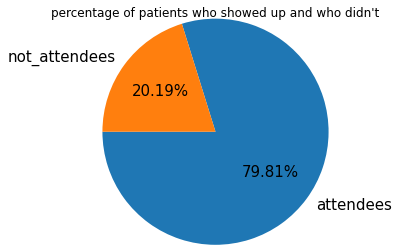

In [24]:
pie(df2,"No_show_dummy", labels=["attendees","not_attendees"], title="percentage of patients who showed up and who didn't")

In [25]:
df3=df2.copy()

### Research Question 2  (What location do many patients come to?)

In [26]:
#actual number of patients
df3=df3.drop_duplicates('Patient_ID')[df3.columns]


In [27]:
neighborhood = df3['Neighbourhood'].value_counts().iloc[:4]


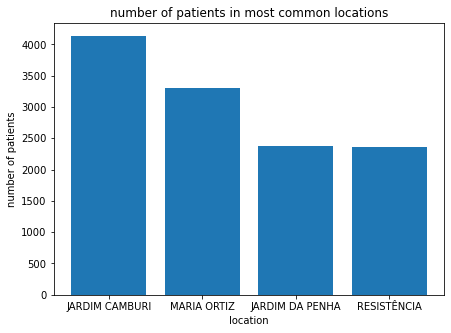

In [28]:
plt.figure(figsize=(7,5))
plt.title("number of patients in most common locations")
plt.bar([1,2,3,4], neighborhood.values, tick_label=neighborhood.index)
plt.xlabel("location")
plt.ylabel("number of patients");

 JARDIM CAMBURI has 4135 patients and More than any other locations

### Research Question 3 (Was sending a message to patients effective in ensuring their attendance at the agreed appointment?)

compare between two groups who received an sms and show up,but another group came without an sms

In [29]:
def compare(df2, x, y):
    attendence=df2[df2[x]==1][y].median()   
    non_attendence=df2[df2[x]==0][y].median()
    return(attendence,non_attendence)

In [30]:
compare(df2 ,"SMS", "No_show_dummy")

(1.0, 1.0)

obs It was useless 

### Research Question 4 (What is the effect of Scholarship on the patient’s commitment to attend the appointment?)

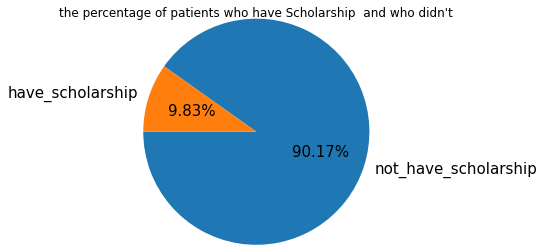

In [31]:
pie(df2,"Scholarship", labels=["not_have_scholarship","have_scholarship"], title="the percentage of patients who have Scholarship  and who didn't")

then we can conclude that the most patients did not have a scholarship,from this step we can think about there is no effect from having a Scholarship on on the patient's commitment to attend the appointment

compare between two groups who have a Scholarship and show up,but another group came without having it

In [32]:
compare(df3 ,"Scholarship", "No_show_dummy")

(1.0, 1.0)

this step To confirm that there is no effect from having Scholarship

### Research Question 5 (What is the effect of alcohol addiction on the patient's commitment to attend the appointment??)

compare between two groups who Alcoholism and show up,but another group did not Alcoholism and also came

In [33]:
compare(df3 ,"Alcoholism", "No_show_dummy")

(1.0, 1.0)

from previous result we can conclude there is no effect 

### Research Question 6 (What is the effect of gender of the patient on the patient’s commitment to attend the appointment?)

In [34]:
def myCountplot(df3, x, title):
    gen=df3.groupby([x,"No_show_dummy"]).count()
    gen["Scheduled_Date"].unstack().plot(kind="bar",stacked=False,figsize=(4,4),grid=False)
    plt.title(title)
    plt.legend(["not_attendants", "attendants"])
    plt.ylabel("number of patients")

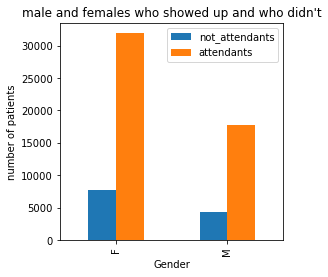

In [35]:
myCountplot(df3,x="Gender",title="male and females who showed up and who didn't")

note:<br>
The vast majority of females attended, as well as for men, and from the drawing we also see that most of the patients were<br> women. In the end, we note that both men and women do not differ much in terms of commitment to the appointment<br>

### Question 7 (Which age group is most committed to their appointment?)


In [36]:
#create bins 
df3['binned_age']=pd.cut(x=df3['Age'], bins=[0,11,21,30,50,115])

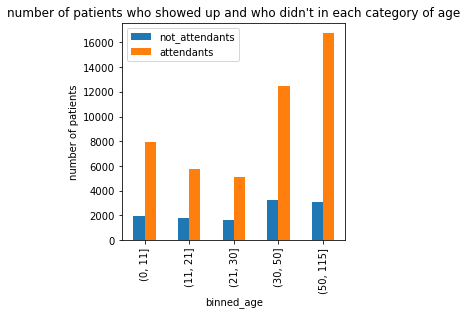

In [37]:
myCountplot(df3,x="binned_age", title="number of patients who showed up and who didn't in each category of age")

it seems that older patients are more commited to their appointments' schedules than others.

### Research Question 8 (Does the waiting time have an effect on patients not attending their appointment?)

In [38]:

period_to_appointment = df2.groupby('No-show')['diff_date'].mean()


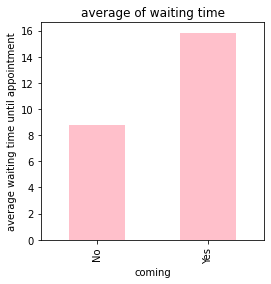

In [39]:
period_to_appointment.plot(kind="bar",figsize=(4,4),color='pink') 
plt.title("average of waiting time")
plt.xlabel('coming')
plt.ylabel('average waiting time until appointment');


it seems, The longer the waiting time, the more no show patients

### Research Question 9(the relation between waiting time and age ?)

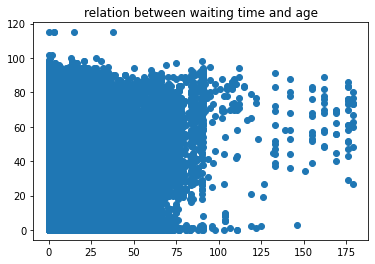

In [40]:
plt.title("relation between waiting time and age") #scatter plot to show the relation between waiting time and age
plt.scatter(df2['diff_date'], df2["Age"]);


In [41]:
correlation = np.corrcoef(df3['diff_date'], df3['Age'])[0, 1] #person correlation
correlation

0.04857275541357966

we can conclude there is a weak positive correlation between them

### Research Question 10(what the effect of Handicap on committed to their appointment ?)

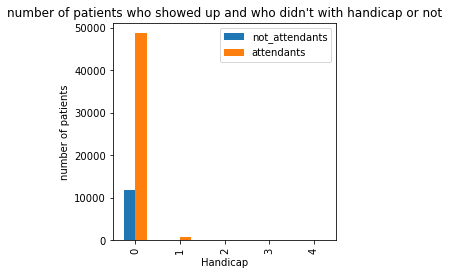

In [42]:
myCountplot(df3,x="Handicap", title="number of patients who showed up and who didn't with handicap or not")

well,most of patients did not have Handicap, so there is no effect in this case

<a id='conclusions'></a>
## Conclusions

> **Tip**:Percentage of patients who show up on their appointments represents 79.81%<br> .
          Percentage of patients who Don't show up on their appointments represents 20.19% <br>
          there are some patients who came more than once<br>
         JARDIM CAMBURI has 4135 patients and The vast majority of them attended therefore this is the most frequent place.<br>
         Sending messages to patients was useless because many patients came without SMS at all<br>
         then we can conclude that the most patients did not have a scholarship,so there is no effect from this factor<br>
         from previous result we can conclude there is no effect of Alcoholism<br>
         number of females who attendant 31936 of 39703 and number of males who attendant 17717 of 22041<br>
         we note that both men and women do not differ much in terms of commitment to the appointment<br>
         it seems that older patients are more commited to their appointments' schedules than others.<br>
         The longer the waiting time, the more no show patients<br>
         we can conclude there is a weak positive correlation between waiting time and age<br>
         well,most of patients did not have Handicap, so there is no effect in this case<br>
         the dependent variable is No-show <br>
         the independent variables are (SMS_received,Gender,wait time,Alcoholism,Handicap)<br>
         
          
     

> **Tip**: i used a  person correlation between waiting time and age 

### Limitations
> **Tip**: 
         1)There are not enough reasons to reveal the reason why the patients did not show up on their appointment<br>
         2)I I think a scatter plot doesn't show the relationships clearly<br>
         3)My analysis was merely stating that there is an effect or there is no effect, or there is a relationship or not,<br> 
          and it is devoid of mentioning convincing reasons for that.<br>




In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1